# 순환 신경망 (Recurrent Neural Network, RNN)

- **순서가 있는 데이터**를 입력으로 받음

- 변화하는 입력에 대한 출력을 얻음

- 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터**

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망

  - 입력 → 은닉 → 출력층 으로 이어지는 단방향 구조

  - 이전 스텝의 출력의 영향을 받지 않음
  - 이전 정보를 고려하지 않기 때문에 순서나 시간에 의존하지 못함
  - 시계열, 자연어처리에는 적합하지 않음.(단순 회귀, 분류 분석에 사용)

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조

  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  

  - 현재 상태가 이전 상태에 종속
  - 순서정보를 처리하는 데 장점

  <br>

  <img src="https://www.researchgate.net/profile/Engin_Pekel/publication/315111480/figure/fig1/AS:472548166115333@1489675670530/Feed-forward-and-recurrent-ANN-architecture.png">

  <sub>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</sub>



## 순환 신경망 구조

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="700">

<br>

- 입력 $x_t$에서 $t$는 시각을 뜻함

- $X_0$에 대한 출력 $Y_0$이 다음 레이어에 전달

- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

## 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- one to one
  - RNN

- one to many
  - Image Captioning

  - 이미지에 대한 설명 생성

- many to one
  - Sentiment Classification

  - 문장의 긍정/부정을 판단하는 감정 분석

- many to many
  - Machine Translation

  - 하나의 언어를 다른 언어로 번역하는 기계 번역

- many to many
  - Video Classification(Frame Level)




## 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치

- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치

- $h$는 '상태'를 기억

- $h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [ ]:
import numpy as np

In [ ]:
timesteps=100
input_features=32
output_features=64

inputs=np.random.random((timesteps, input_features))
state_t=np.zeros((output_features))

W=np.random.random((output_features,input_features))
U=np.random.random((output_features,output_features))
b=np.random.random((output_features,))

succesive_outputs=[]

for input_t in inputs:
  output_t=np.tanh(np.dot(W, input_t)+np.dot(U,state_t)+b)
  succesive_outputs.append(output_t)
  state_t=output_t

final_output_sequence=np.stack(succesive_outputs, axis=0)

## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

In [ ]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences='True'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [ ]:
model=Sequential()
model.add(Embedding(10000,32))
# 층 쌓기
model.add(SimpleRNN(32,return_sequences='True'))
model.add(SimpleRNN(32,return_sequences='True'))
model.add(SimpleRNN(32,return_sequences='True'))
model.add(SimpleRNN(32,return_sequences='True'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## IMDB 데이터 적용

### 데이터 로드

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [ ]:
num_words=10000
max_len=500
batch_size=32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)
print(len(input_train))
print(len(input_test))

#max_len 크기만큼 fix된 공간을 채우고, 공간이 비어있으면 padding해서 공간을 채워줌
input_train=sequence.pad_sequences(input_train,maxlen=max_len)
input_test=sequence.pad_sequences(input_test,maxlen=max_len)
print(input_train.shape)
print(input_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Embedding(num_words,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [ ]:
history=model.fit(input_train,y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - acc: 0.5451 - loss: 0.6861 - val_acc: 0.5348 - val_loss: 0.7688
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - acc: 0.7515 - loss: 0.5254 - val_acc: 0.7480 - val_loss: 0.5223
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - acc: 0.8119 - loss: 0.4345 - val_acc: 0.8180 - val_loss: 0.4557
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step - acc: 0.8873 - loss: 0.2838 - val_acc: 0.7744 - val_loss: 0.4786
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - acc: 0.9083 - loss: 0.2406 - val_acc: 0.8124 - val_loss: 0.4685
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - acc: 0.9440 - loss: 0.1609 - val_acc: 0.8382 - val_loss: 0.4694
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - acc: 0.9642 - loss: 0.1057 - val_acc: 0.8300 - val_loss: 0.4624
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - acc: 0.9829 - loss: 0.0612 - val_acc: 0.8114 - val_loss: 0.5544
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━

### 시각화

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-12-60d85d81d40e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


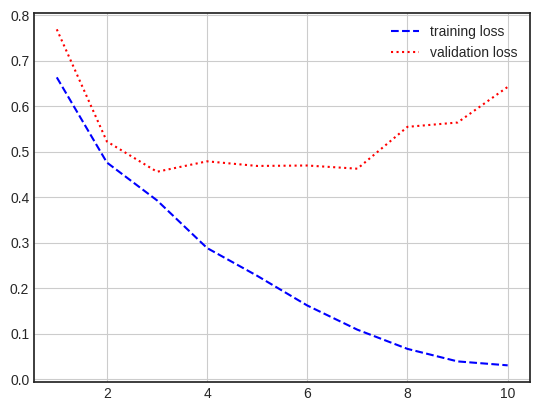

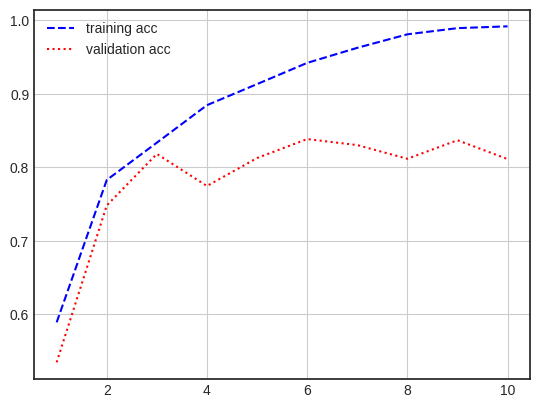

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['acc']
val_acc=history.history['val_acc']

epochs=range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training acc')
plt.plot(epochs, val_acc, 'r:', label='validation acc')
plt.grid()
plt.legend()

plt.show()

In [ ]:
model.evaluate(input_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - acc: 0.8037 - loss: 0.6868


[0.6657938361167908, 0.8094000220298767]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



# LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## IMDB 데이터

### 데이터 로드

In [ ]:
#!pip install --upgrade tensorflow

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
num_words=10000
max_len=500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
print(len(x_train))
print(len(x_test))

#max_len 크기만큼 fix된 공간을 채우고, 공간이 비어있으면 padding해서 공간을 채워줌
pad_x_train=sequence.pad_sequences(x_train,maxlen=max_len)
pad_x_test=sequence.pad_sequences(x_test,maxlen=max_len)
print(pad_x_train.shape)
print(pad_x_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding

In [ ]:
model=Sequential()
model.add(Embedding(num_words,32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [ ]:
history=model.fi(pad_x_train, y_train,
                 epochs=10,
                 batch_size=128,
                 validatin_split=0.2)

AttributeError: 'Sequential' object has no attribute 'fi'

### 시각화

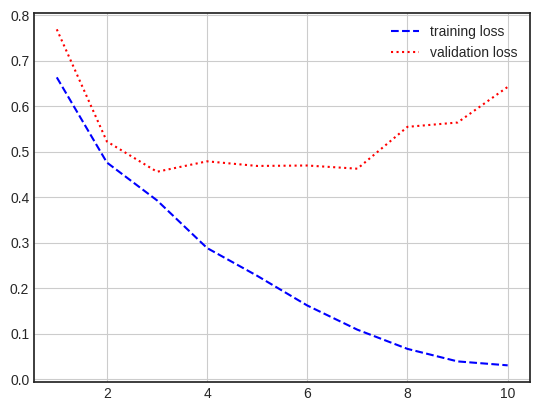

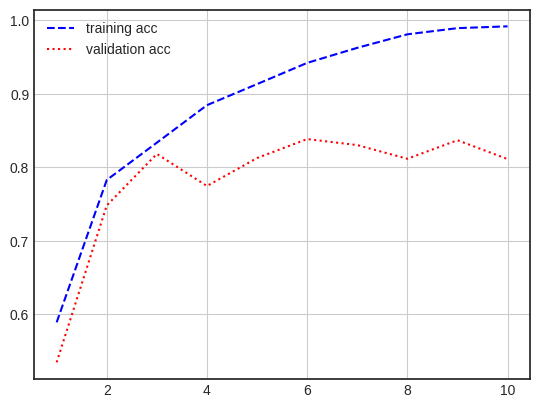

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['acc']
val_acc=history.history['val_acc']

epochs=range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training acc')
plt.plot(epochs, val_acc, 'r:', label='validation acc')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [ ]:
model.evaluate(pad_x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - acc: 0.4845 - loss: 0.6934


[0.6933315992355347, 0.4837999939918518]

# GRU (Gated Recurrent Unit)
- LSTM을 더 단순하게 만든 구조

- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음
- 빠른 학습, 낮은 계산 복잡도
- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- update gate
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함
  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub>출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>

  ### $\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$


## Reuters 데이터

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋
  - 다중 분류 문제


### 데이터셋 로드

In [ ]:
from tensorflow.keras.datasets import reuters

In [ ]:
num_words=10000

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)
print(len(x_train))
print(len(x_test))

print(x_test.shape)
print(y_test.shape)

8982
2246
(2246,)
(2246,)


### 데이터 전처리 및 확인

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences # 전처리 해주는 라이브러리

In [ ]:
max_len=300

In [ ]:
pad_x_train=pad_sequences(x_train, maxlen=max_len)
pad_x_test=pad_sequences(x_test, maxlen=max_len)

print(len(pad_x_train[0]))

300


In [ ]:
pad_x_train[5]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [ ]:
model=Sequential()
model.add(Embedding(input_dim=num_words, output_dim=256))
model.add(GRU(256, return_sequences=True))
model.add(GRU(128))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [ ]:
history=model.fit(pad_x_train, y_train,
                 epochs=32,
                 batch_size=20,
                 validation_split=0.2)

Epoch 1/32
360/360 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - acc: 0.4347 - loss: 2.2832 - val_acc: 0.5643 - val_loss: 1.7127
Epoch 2/32
360/360 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - acc: 0.5812 - loss: 1.6749 - val_acc: 0.5977 - val_loss: 1.5436
Epoch 3/32
360/360 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - acc: 0.6737 - loss: 1.2851 - val_acc: 0.6806 - val_loss: 1.2790
Epoch 4/32
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - acc: 0.7564 - loss: 0.9610 - val_acc: 0.7173 - val_loss: 1.1427
Epoch 5/32
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - acc: 0.7883 - loss: 0.8006 - val_acc: 0.7262 - val_loss: 1.1480
Epoch 6/32
360/360 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - acc: 0.8644 - loss: 0.5404 - val_acc: 0.7340 - val_loss: 1.1355
Epoch 7/32
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - acc: 0.8913 - loss: 0.4380 - val_acc: 0.7362 - val_loss: 1.1436
Epoch 8/32
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - acc: 0.9231 - loss: 0.3226 - val_acc: 0.7435 - val_loss: 1.1836
Epoch 9/32
360/360 ━━━━━━━━━━━━━━━━━━━━ 

### 시각화

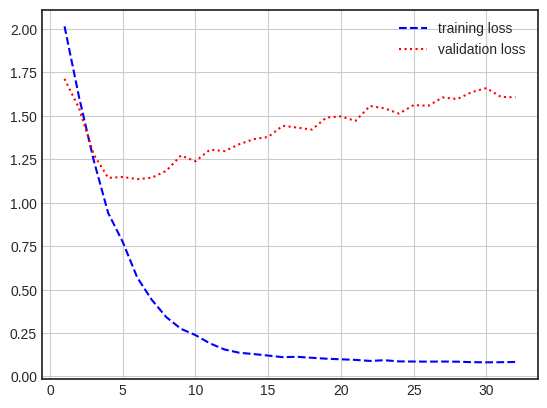

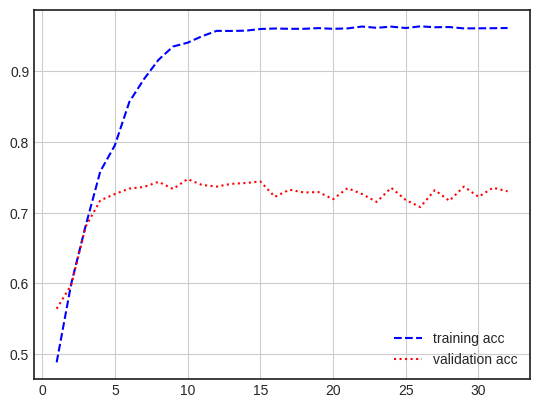

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['acc']
val_acc=history.history['val_acc']

epochs=range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training acc')
plt.plot(epochs, val_acc, 'r:', label='validation acc')
plt.grid()
plt.legend()

plt.show()

### 모델 평가


In [ ]:
model.evaluate(pad_x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.7288 - loss: 1.5642


[1.6711242198944092, 0.7208370566368103]